## Zadanie 1

In [1]:
using QuadGK
using Polynomials
using Plots
using Memoize

In [2]:
@memoize P(k) = k == 0 ? Polynomial([1]) : 
                k == 1 ? Polynomial([0, 1]) : 
                (2k - 1) / k * Polynomial([0, 1]) * P(k - 1) - (k - 1) / k * P(k - 2)

P (generic function with 1 method)

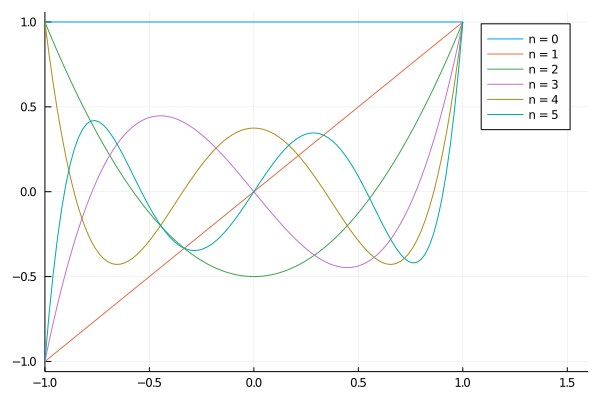

In [3]:
plot(xlim=(-1, 1.6))
for k in 0:5
    plot!(P(k), (-1, 1)..., label="n = $k")
end
plot!()

In [4]:
for k in 2:4
    (xs, a) = gauss(k)
    println("k = $k")
    println(sort(roots(P(k))))
    println(xs)
    println()
end

k = 2
[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]

k = 3
[-0.7745966692414834, 0.0, 0.7745966692414835]
[-0.7745966692414834, 0.0, 0.7745966692414834]

k = 4
[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]



Odcięte $x_i$ n-punktowej kwadratury Gaussa z funkcją ważącą $w(x)$ w $[a,b]$ są zerami wielomianu ortogonalnego $φ_n(x)$ dla tego samego przedziału i tej samej funkcji ważącej.

## Zadanie 2

Kwadratura ma stopień dokładności $2n - 1$ (dla $n$-punktowej kwadratury)

In [5]:
function integral(f, k)
    (xp, a) = gauss(Float64, k)
    sum(a .* f.(xp))
end

integral (generic function with 1 method)

In [6]:
integral(x -> x^2, 1000)

0.6666666666666665

In [21]:
f(x) = x^6
F(x) = 1/7 * x ^ 7
for i in 1:10
    println("$i: ", integral(f, i))
end
println("Analytical: ", F(1) - F(-1))

1: 0.0
2: 0.07407407407407413
3: 0.24000000000000007
4: 0.28571428571428586
5: 0.2857142857142858
6: 0.28571428571428586
7: 0.2857142857142859
8: 0.2857142857142856
9: 0.2857142857142859
10: 0.28571428571428575
Analytical: 0.2857142857142857


## Zadanie 3

In [8]:
function integral(f, k, lim)
    (a, b) = lim
    F(z) = f((b + a) / 2 + (b - a) / 2 * z) * (b - a) / 2
    integral(F, k)
end

integral (generic function with 2 methods)

In [22]:
f(x) = x^6
F(x) = 1/7 * x ^ 7
lim = (-2, 3)
for i in 1:10
    println("$i: ", integral(f, i, lim))
end
println("Analytical: ", F(lim[2]) - F(lim[1]))

1: 0.078125
2: 136.4351851851852
3: 302.81250000000006
4: 330.71428571428584
5: 330.7142857142859
6: 330.71428571428595
7: 330.714285714286
8: 330.7142857142858
9: 330.71428571428595
10: 330.7142857142858
Analytical: 330.71428571428567


## Zadanie 4

In [10]:
using Infinity

In [11]:
(I, E) = quadgk(x -> x^4, -2, 2)

(12.799999999999999, 1.7763568394002505e-15)

In [12]:
(I, E) = quadgk(x -> 1 / sqrt(2 * π) * ℯ^(-x^2 / 2), -float(∞), float(∞))

(1.0000000000032583, 1.4395584941504537e-8)

## Zadanie 5

In [13]:
function d(f, x, h, n)
    n == 0 ? f(x) : n == 1 ? (f(x + h) - f(x - h)) / (2 * h) : (d(f, x + h, h, n-1) - d(f, x - h, h, n-1)) / (2 * h)
end

d (generic function with 1 method)

In [14]:
function trapezoidal(f, lim, accuracy=1e6)
    (a, b) = lim
    acc = floor(Int, accuracy)
    I, E = 0, 0
    xi = a
    h = 1 / acc * (b - a)
    for i in 1:acc
        xj = i / acc * (b - a) + a
        I += 1 / 2 * (f(xi) + f(xj)) * h
        E = max(E, (b - a) ^ 3 / (12 * acc ^ 2) * d(f, (xi + xj) / 2, h, 2))
        xi = xj
    end
    I, abs(E)
end

trapezoidal (generic function with 2 methods)

In [15]:
trapezoidal(x -> ℯ ^ (2 * x + 1), (-1, 2), 1e7)

(74.02263983070644, 1.3359979789129284e-11)

Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu w stosunku do wyniku otrzymanego analitycznie, w zaleznosci od ilosci potrzebnych przedziałów dla przykładowych funkcji:

1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale [0,2π])

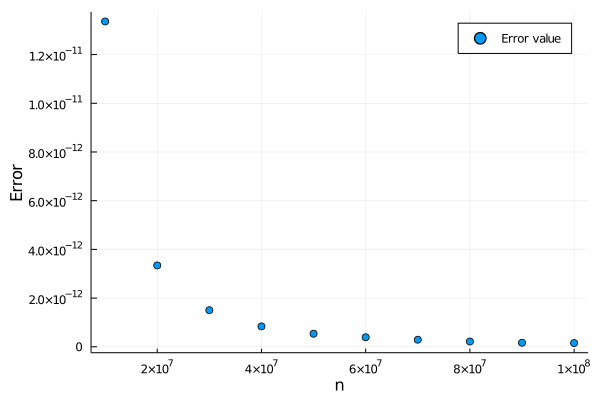

In [16]:
f(x) = ℯ ^ (2 * x + 1)
lim = (-1, 2)
scatter(
    acc -> trapezoidal(f, lim, acc)[2], 
    map(x -> x * 10^7, 1:10),
    label="Error value",
    xlabel="n",
    ylabel="Error"
)

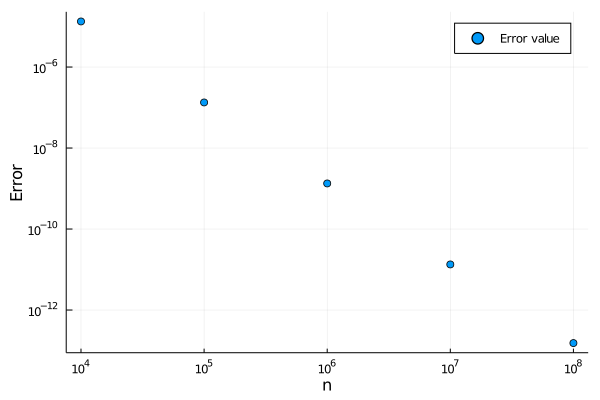

In [17]:
scatter(
    acc -> trapezoidal(f, lim, acc)[2], 
    map(x -> 10 ^ x, 4:8),
    xaxis=:log, 
    yaxis=:log, 
    label="Error value",
    xlabel="n",
    ylabel="Error"
)

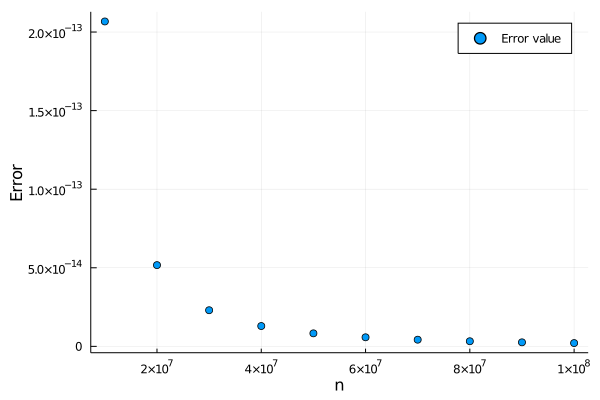

In [18]:
f(x) = sin(x)
lim = (0, 2 * π)
scatter(
    acc -> trapezoidal(f, lim, acc)[2], 
    map(x -> x * 10^7, 1:10), 
    label="Error value",
    xlabel="n",
    ylabel="Error"
)

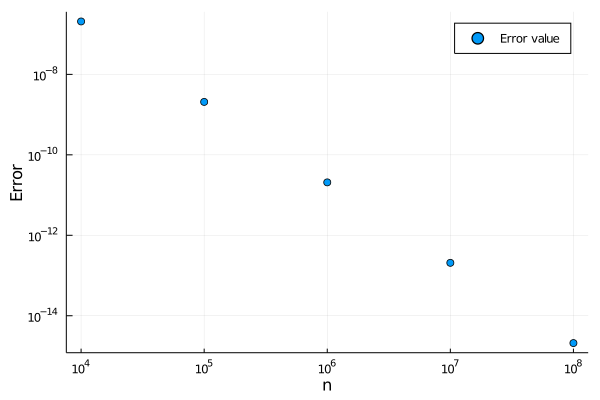

In [19]:
scatter(
    acc -> trapezoidal(f, lim, acc)[2], 
    map(x -> 10 ^ x, 4:8), 
    xaxis=:log, 
    yaxis=:log, 
    label="Error value",
    xlabel="n",
    ylabel="Error"
)